### FIT3162 Exploratory Analysis 
#### Fakeddit Fakenews Dataset

In [38]:
import pandas as pd
import numpy as np
import datetime as dt
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from collections import Counter
import csv

In [39]:
cd D:\Semester 6\FIT3162\Fakeddit

D:\Semester 6\FIT3162\Fakeddit


In [40]:
pwd

'D:\\Semester 6\\FIT3162\\Fakeddit'

In [41]:
train_df = pd.read_csv("datasetv2/datasetv2.0/train.tsv", sep='\t')

In [42]:
train_df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1,author,clean_title,created_utc,domain,hasImage,id,image_url,linked_submission_id,num_comments,score,subreddit,title,upvote_ratio,2_way_label,3_way_label,6_way_label
0,0,0,NaN,NaN,Alexithymia,my walgreens offbrand mucinex was engraved wit...,1.551641e+09,i.imgur.com,True,awxhir,https://external-preview.redd.it/WylDbZrnbvZdB...,NaN,2.0,12,mildlyinteresting,My Walgreens offbrand Mucinex was engraved wit...,0.84,1,0,0
1,1,1,714550.0,714550.0,RickSisco,NaN,1.443822e+09,NaN,True,cvm5uy4,http://i.imgur.com/yxrkYT8.jpg,3n7fld,NaN,5,psbattle_artwork,NaN,NaN,0,2,4
2,2,2,NaN,NaN,VIDCAs17,this concerned sink with a tiny hat,1.534727e+09,i.redd.it,True,98pbid,https://preview.redd.it/wsfx0gp0f5h11.jpg?widt...,NaN,2.0,119,pareidolia,This concerned sink with a tiny hat,0.99,0,2,2
3,3,3,NaN,NaN,prometheus1123,hackers leak emails from uae ambassador to us,1.496511e+09,aljazeera.com,True,6f2cy5,https://external-preview.redd.it/6fNhdbc6K1vFA...,NaN,1.0,44,neutralnews,Hackers leak emails from UAE ambassador to US,0.92,1,0,0
4,4,4,1228398.0,1228398.0,NaN,NaN,1.378792e+09,NaN,True,cc5cbon,http://i.imgur.com/M8KTWMx.jpg,1lz1q0,NaN,3,psbattle_artwork,NaN,NaN,0,2,4


In [43]:
test_df = pd.read_csv("datasetv2/datasetv2.0/test_public.tsv", sep='\t')

In [44]:
validate_df = pd.read_csv("datasetv2/datasetv2.0/validate.tsv", sep='\t')

In [45]:
merged_df = pd.concat([train_df, test_df], axis=0)

In [46]:
merged_df = pd.concat([merged_df, validate_df], axis=0)

### Performing Statistics on Raw Dataset

In [47]:
def perform_statistics(df):
    total = len(df)
    fake_articles = len(df.loc[df['2_way_label'] == 0])
    true_articles = len(df.loc[df['2_way_label'] == 1])
    num_of_subreddits = df['subreddit'].nunique()
    num_of_domains = df['domain'].nunique()
    mean_comments = df['num_comments'].mean()
    mean_title_len = merged_df['title'].replace(np.nan, '').str.split().apply(len).mean()
    min_date = dt.datetime.fromtimestamp(min(merged_df['created_utc']))
    max_date = dt.datetime.fromtimestamp(max(merged_df['created_utc']))
    
    print("-" * 30)
    print("Total Samples:", total)
    print("-" * 30)
    print("Fake Samples:", fake_articles)
    print("-" * 30)
    print("True Samples:", true_articles)
    print("-" * 30)
    print("Unique Subreddits:", num_of_subreddits)
    print("-" * 30)
    print("Unique Domains:", num_of_domains)
    print("-" * 30)
    print("Mean No of Comments:", mean_comments)
    print("-" * 30)
    print("Mean Words in title:", mean_title_len)
    print("-" * 30)
    print("Min Creation Date:", min_date)
    print("-" * 30)
    print("Max Creation Date:", max_date)
    print("-" * 30)


In [48]:
perform_statistics(merged_df)

------------------------------
Total Samples: 1063106
------------------------------
Fake Samples: 578189
------------------------------
True Samples: 484917
------------------------------
Unique Subreddits: 22
------------------------------
Unique Domains: 23070
------------------------------
Mean No of Comments: 17.98840682086149
------------------------------
Mean Words in title: 7.880655362682555
------------------------------
Min Creation Date: 2008-05-23 12:52:56
------------------------------
Max Creation Date: 2019-11-16 06:56:34
------------------------------


In [49]:
# comments_df = pd.read_csv("comments/all_comments.tsv", sep='\t', quoting=csv.QUOTE_NONE, error_bad_lines=False, lineterminator='\n')

In [50]:
# comments_df.head(5)

In [51]:
# len(comments_df)

In [52]:
merged_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1',
       'author', 'clean_title', 'created_utc', 'domain', 'hasImage', 'id',
       'image_url', 'linked_submission_id', 'num_comments', 'score',
       'subreddit', 'title', 'upvote_ratio', '2_way_label', '3_way_label',
       '6_way_label'],
      dtype='object')

### Pre-processing Dataset

In [53]:
# Remove unwanted columns in the dataframe
df=merged_df.iloc[:,[5, 6, 9,12,14,16, 17]]
df=df.iloc[:,:]
df.head(10)

,clean_title,created_utc,id,num_comments,subreddit,upvote_ratio,2_way_label
0,my walgreens offbrand mucinex was engraved wit...,1.551641e+09,awxhir,2.0,mildlyinteresting,0.84,1
1,NaN,1.443822e+09,cvm5uy4,NaN,psbattle_artwork,NaN,0
2,this concerned sink with a tiny hat,1.534727e+09,98pbid,2.0,pareidolia,0.99,0
3,hackers leak emails from uae ambassador to us,1.496511e+09,6f2cy5,1.0,neutralnews,0.92,1
4,NaN,1.378792e+09,cc5cbon,NaN,psbattle_artwork,NaN,0
5,this flower in my neighborhood,1.557764e+09,bo5i67,0.0,mildlyinteresting,0.92,1
6,puppy taking in the view,1.471341e+09,4xypkv,26.0,photoshopbattles,0.95,1
7,i found a face in my sheet music too,1.525318e+09,8gnet9,2.0,pareidolia,0.84,0
8,escobar a couple of thoughts,1.506021e+09,71lejc,1.0,fakealbumcovers,0.81,0
9,bride and groom exchange vows after fatal shoo...,1.423681e+09,2vkbtj,7.0,nottheonion,0.64,1


In [54]:
# Remove titles with NaN 
df = df.dropna(subset = ["clean_title"])
df.tail(10)

,clean_title,created_utc,id,num_comments,subreddit,upvote_ratio,2_way_label
92433,halfbaked burglar plunders familys pavlova,1.387542e+09,1tbjsx,0.0,nottheonion,0.75,1
92434,uranus might be full of surprises,1.416004e+09,2mbsg2,2.0,nottheonion,0.86,1
92435,hungry hungry hippo,1.411154e+09,ckmzveb,NaN,psbattle_artwork,NaN,0
92436,trying to build a custom painted cooler,1.469538e+09,4uoh7r,19.0,subredditsimulator,0.90,0
92438,russian bid to influence brexit vote detailed ...,1.552126e+09,az1zlp,2.0,neutralnews,0.81,1
92439,nicaraguan bank sanctioned by us shuts down,1.556673e+09,bjb8g9,0.0,usnews,1.00,1
92440,this column and emergency light,1.506690e+09,737mcu,0.0,pareidolia,1.00,0
92441,former royal marine selling medals to help fun...,1.560033e+09,bydg0l,0.0,upliftingnews,0.86,1
92442,so proud,1.361106e+09,c8gnd59,NaN,psbattle_artwork,NaN,0
92443,i tried,1.500573e+09,dkhfq81,NaN,psbattle_artwork,NaN,0


In [55]:
# Change Date from UTC to Datetime
def get_date(created):
    return dt.datetime.fromtimestamp(created)
df["created_utc"] = df["created_utc"].apply(get_date)

In [56]:
df = df.reset_index(drop = True)

In [75]:
df.head()

,clean_title,created_utc,id,num_comments,subreddit,upvote_ratio,2_way_label
0,my walgreens offbrand mucinex was engraved wit...,2019-03-04 03:27:24,awxhir,2.0,mildlyinteresting,0.84,1
1,this concerned sink with a tiny hat,2018-08-20 09:10:13,98pbid,2.0,pareidolia,0.99,0
2,hackers leak emails from uae ambassador to us,2017-06-04 01:26:38,6f2cy5,1.0,neutralnews,0.92,1
3,this flower in my neighborhood,2019-05-14 00:13:45,bo5i67,0.0,mildlyinteresting,0.92,1
4,puppy taking in the view,2016-08-16 17:51:30,4xypkv,26.0,photoshopbattles,0.95,1


In [58]:
df2 = df[['clean_title', '2_way_label']]
df2 = df2.loc[df2['2_way_label'] == 1]

In [59]:
df2.head()

,clean_title,2_way_label
0,my walgreens offbrand mucinex was engraved wit...,1
2,hackers leak emails from uae ambassador to us,1
3,this flower in my neighborhood,1
4,puppy taking in the view,1
7,bride and groom exchange vows after fatal shoo...,1


In [60]:
stop = stopwords.words('english')
x = df2['clean_title'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))
x = x.to_frame()

In [61]:
x = x.reset_index(drop = True)

In [62]:
common = Counter(" ".join(x["clean_title"]).split()).most_common(5)

In [63]:
common

[('man', 25622),
 ('like', 15930),
 ('dog', 14244),
 ('found', 13626),
 ('cat', 12298)]

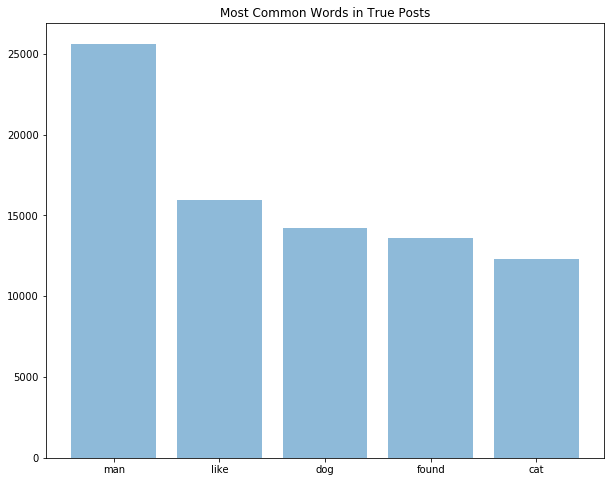

In [64]:
x_val = [i for i in range(len(common))]
y_val = [int(x[1]) for x in common]
labels = [str(x[0]) for x in common]

f, ax = plt.subplots(figsize=(10,8)) 
plt.bar(x_val, y_val, align='center', alpha=0.5)
plt.title('Most Common Words in True Posts')
plt.xticks(x_val, labels)
plt.show()

In [65]:
df2 = df[['clean_title', '2_way_label']]
df2 = df2.loc[df2['2_way_label'] == 0]

In [66]:
x = df2['clean_title'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))
x = x.to_frame()

In [67]:
x = x.reset_index(drop = True)

In [68]:
common = Counter(" ".join(x["clean_title"]).split()).most_common(5)
common

[('like', 11676),
 ('discussions', 9270),
 ('new', 8888),
 ('one', 8673),
 ('happy', 8425)]

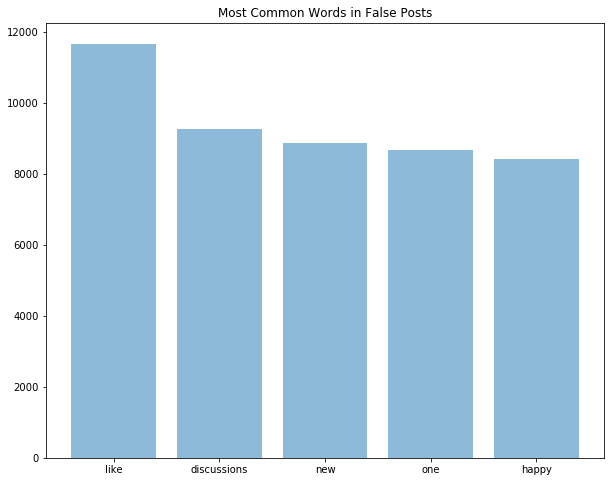

In [69]:
x_val = [i for i in range(len(common))]
y_val = [int(x[1]) for x in common]
labels = [str(x[0]) for x in common]

f, ax = plt.subplots(figsize=(10,8)) 
plt.bar(x_val, y_val, align='center', alpha=0.5)
plt.title('Most Common Words in False Posts')
plt.xticks(x_val, labels)
plt.show()

##### Comparison of Upvote to Downvote ratio For Fake and Real posts

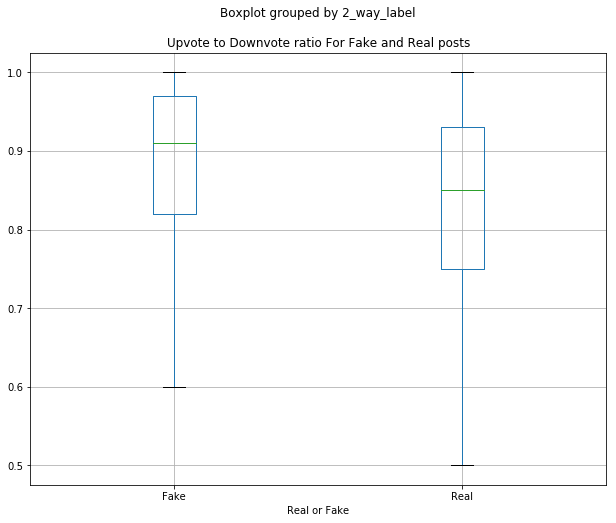

In [72]:
fig, ax = plt.subplots(figsize=(10,8))
plt.suptitle('')
df.boxplot(column=['upvote_ratio'], by='2_way_label', showfliers=False, ax=ax)
plt.title('Upvote to Downvote ratio For Fake and Real posts')
plt.xlabel('Real or Fake')
plt.xticks([1, 2], ['Fake', 'Real'])
plt.show()

In [53]:
test = pd.read_csv("comments/comments_10.csv", sep=',')

C:\Users\saadu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [55]:
test.tail()

,Column1,id,author,body,isTopLevel,parent_id,submission_id,ups
954119,10601588.0,c4po9sb,razorsheldon,"Yeah, me too. Unfortunately, child abduction ...",False,t1_c4pmve5,tti4x,1.0
954120,10601589.0,c4pll5i,l3tigre,"I'm from KY, and just happy to see a nice stor...",True,t3_tthxb,tthxb,6.0
954121,10601590.0,c4pq81h,NaN,"Hm, is this spinning for anyone else? Both the...",True,t3_tteum,tteum,1.0
954122,10601591.0,c4pok5u,depressed_clown,"This was on a radio station's ""nieuws van het ...",True,t3_tteg6,tteg6,3.0
954123,10601592.0,c4rj7nt,analcarbomb,It's things like this that keep me on this sit...,True,t3_tteg6,tteg6,2.0


In [4]:
import glob, os
df = pd.concat(map(pd.read_csv, glob.glob(os.path.join('comments', "comment*.csv"))))

C:\Users\saadu\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
df = df.reset_index(drop = True)

In [9]:
df.head()

,Column1,id,author,body,isTopLevel,parent_id,submission_id,ups
0,0.0,f4deplg,Haus42,"Scroll, scroll, scroll. Pause. Scroll back u...",True,t3_dkdml1,dkdml1,162.0
1,1.0,f4d79bi,PotatoPrince84,A lot of the people who felt quite strongly ab...,True,t3_dkdml1,dkdml1,84.0
2,2.0,f4ddmlk,MadeToAchieveBalance,T H E S P H E R E S H A L L R I S E A ...,True,t3_dkdml1,dkdml1,34.0
3,3.0,f4dknfn,MrBigRed,All hail the cube of justice,True,t3_dkdml1,dkdml1,9.0
4,4.0,f4dgdur,burritosenior,That is glorious.,True,t3_dkdml1,dkdml1,4.0


In [10]:
len(df)

10002699

In [11]:
# Remove all rows which are deleted or removed
df = df.loc[(df['body'] != "[deleted]") & (df['body'] != "[removed]")]

In [16]:
len(df)

9570356

In [19]:
df = df.dropna(subset = ["body", "submission_id"])

In [29]:
len(df)

9568309

In [30]:
# Drop Unwanted Column
df = df.drop(['Column1'], axis=1)

In [36]:
def check_comment_stats(df):
    total = len(df)
    unique_posts = df['submission_id'].nunique()

    print("-" * 30)
    print("Total Comments:", total)
    print("-" * 30)
    print("Unique Posts with comments:", unique_posts)
    print("-" * 30)


In [37]:
check_comment_stats(df)

------------------------------
Total Comments: 9568309
------------------------------
Unique Posts with comments: 618777
------------------------------


In [33]:
df.head()

,id,author,body,isTopLevel,parent_id,submission_id,ups
0,f4deplg,Haus42,"Scroll, scroll, scroll. Pause. Scroll back u...",True,t3_dkdml1,dkdml1,162.0
1,f4d79bi,PotatoPrince84,A lot of the people who felt quite strongly ab...,True,t3_dkdml1,dkdml1,84.0
2,f4ddmlk,MadeToAchieveBalance,T H E S P H E R E S H A L L R I S E A ...,True,t3_dkdml1,dkdml1,34.0
3,f4dknfn,MrBigRed,All hail the cube of justice,True,t3_dkdml1,dkdml1,9.0
4,f4dgdur,burritosenior,That is glorious.,True,t3_dkdml1,dkdml1,4.0


In [34]:
df.iloc[0]['body']

'Scroll, scroll, scroll.  Pause.  Scroll back up.  Check which subreddit this article is in.  Nod in approval.  Upvote.  Continue scrolling.'